In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
df = pd.read_csv('C:\\Users\\Ralph Ossenblok\\git\\data-analytics-and-science\\exercises\\exercise 1 - loan prediction problem\\data\\train.csv')

In [10]:
train.head()

NameError: name 'train' is not defined

In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


NameError: name 'train' is not defined

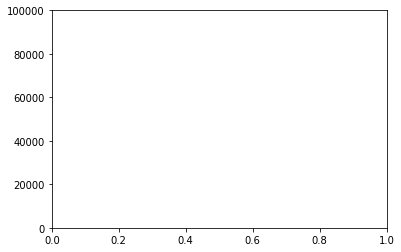

In [14]:
plt.ylim(0, 100000)

sb.boxplot(y = 'ApplicantIncome', data = train)

In [15]:
property_areas = pd.get_dummies(df['Property_Area'])

df = pd.concat([df, property_areas], axis = 1)

df.drop(['Property_Area'], inplace = True, axis = 1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,0,0,1


In [16]:
df = df.replace({
    'Gender': {'Male': 0, 'Female': 1}, 
    'Education': {'Graduate': 1, 'Not Graduate': 0}, 
    'Married': { 'Yes': 1, 'No': 0},
    'Self_Employed': { 'Yes': 1, 'No': 0},
    'Loan_Status': { 'Y': 1, 'N': 0}
    })


In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [38]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Loan_Status           0
Rural                 0
Semiurban             0
Urban                 0
Credit_History_No     0
Credit_History_Yes    0
No_Dependents         0
One_Dependents        0
Two_Dependents        0
>3_Dependents         0
dtype: int64

In [19]:
df['LoanAmount'].median()

128.0

In [20]:
df['Self_Employed'] = df['Self_Employed'].fillna(1.0)

In [21]:
table = df.pivot_table(values = 'LoanAmount', index = 'Self_Employed', columns = 'Education', aggfunc = np.median)

In [22]:
def loanvalues(series):
    return table.loc[series['Self_Employed'], series['Education']]

In [23]:
#                     SERIES          NAs  (                Waardes voor fill na                    )        
df['LoanAmount'] = df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(loanvalues, axis = 1))

In [24]:
df['Gender'].value_counts()

0.0    489
1.0    112
Name: Gender, dtype: int64

In [25]:
df['Gender'] = df['Gender'].fillna(0.0)

# Credit History

In [26]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
credit_history = pd.get_dummies(df['Credit_History'])

df = pd.concat([df, credit_history], axis = 1)

df.drop(['Credit_History'], inplace = True, axis = 1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Rural,Semiurban,Urban,0.0,1.0
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,130.0,360.0,1,0,0,1,0,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,0,1,0,0,0,1
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1,0,0,1,0,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1,0,0,1,0,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1,0,0,1,0,1


In [28]:
df.rename(columns = {0.0 : 'Credit_History_No', 1.0 : 'Credit_History_Yes'}, inplace = True)

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Rural,Semiurban,Urban,Credit_History_No,Credit_History_Yes
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,130.0,360.0,1,0,0,1,0,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,0,1,0,0,0,1
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1,0,0,1,0,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1,0,0,1,0,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1,0,0,1,0,1


# Loan amount term

In [30]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [31]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)

# Dependents

In [32]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
dependents = pd.get_dummies(df['Dependents'])

df = pd.concat([df, dependents], axis = 1)

df.drop(['Dependents'], inplace = True, axis = 1)
df.rename(columns = {'0' : 'No_Dependents', '1' : 'One_Dependents', '2': 'Two_Dependents', '3+': '>3_Dependents'}, inplace = True)


In [34]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Rural,Semiurban,Urban,Credit_History_No,Credit_History_Yes,No_Dependents,One_Dependents,Two_Dependents,>3_Dependents
0,LP001002,0.0,0.0,1,0.0,5849,0.0,130.0,360.0,1,0,0,1,0,1,1,0,0,0
1,LP001003,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,0,1,0,0,0,1,0,1,0,0
2,LP001005,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1,0,0,1,0,1,1,0,0,0
3,LP001006,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1,0,0,1,0,1,1,0,0,0
4,LP001008,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1,0,0,1,0,1,1,0,0,0


# Married

In [35]:
df = df.dropna() #zijn maar 3 observaties

In [43]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=3)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\ProgramData\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
Y = 'Loan_Status'
model = LogisticRegression()
X = ['Credit_History_No', 'Credit_History_Yes']

classification_model(model, df, X, Y)

Accuracy : 80.851%
Cross-Validation Score : 80.854%
